# Python Answer 9

In [1]:
# dataset link
url = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'

In [2]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# to display all the columns
pd.options.display.max_columns = None

In [4]:
# reading the data from given link and storing in DataFrame object
data = pd.read_csv(url)
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


## Cars that do not qualify for clean alternative fuel vehicle.

In [5]:
cafv = data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
not_qualified = data[data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Not eligible due to low battery range']
print('-'*50)
print('Clean Alternative Fuel Vehicle (CAFV) Eligibility')
print('-'*50)
print(cafv)
print('-'*50)
print('Top 5 Results\n', not_qualified[['Make', 'Model']].head())

--------------------------------------------------
Clean Alternative Fuel Vehicle (CAFV) Eligibility
--------------------------------------------------
Clean Alternative Fuel Vehicle Eligible                         60551
Eligibility unknown as battery range has not been researched    53446
Not eligible due to low battery range                           16446
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64
--------------------------------------------------
Top 5 Results
     Make   Model
6   FORD  FUSION
7   AUDI    Q5 E
8   FORD   C-MAX
14  FORD   C-MAX
15   KIA    NIRO


So there are __16446__ cars that are not eligible for CAFV.

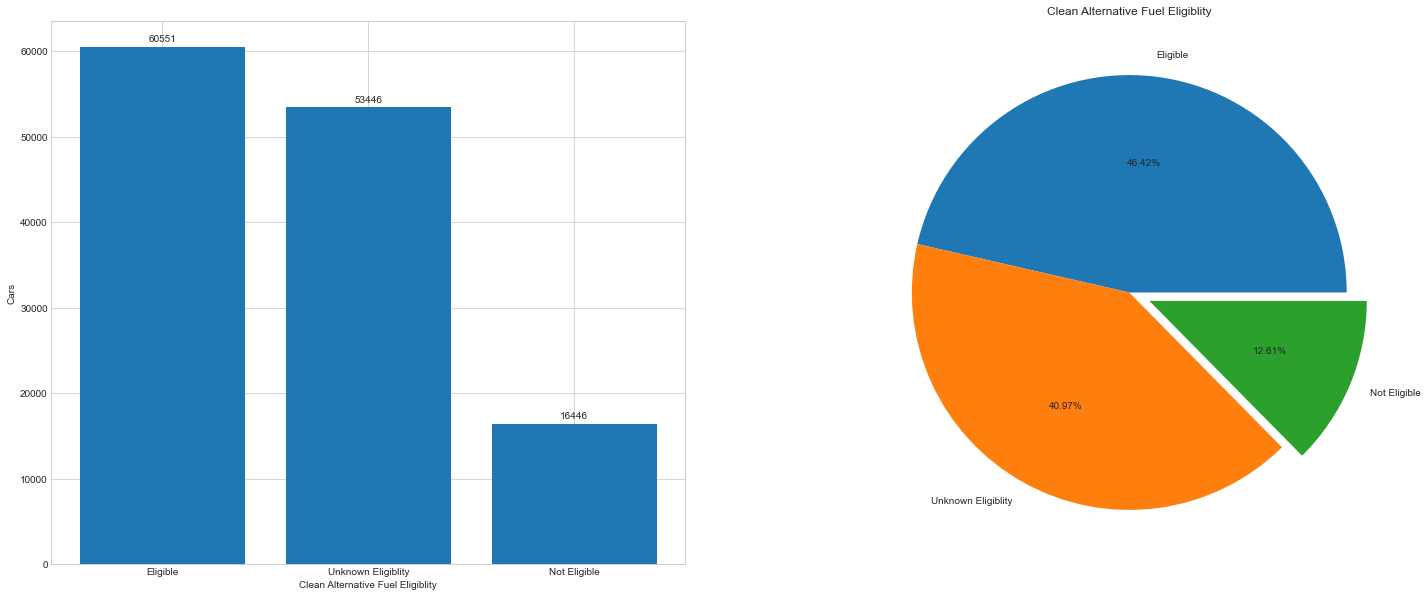

In [6]:
plt.style.use('seaborn-whitegrid')
# creating figure and axes
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(25, 10))
labels = ['Eligible', 'Unknown Eligiblity', 'Not Eligible']
# bar plot
bars = ax_1.bar(x=labels, height=cafv.values)
ax_1.bar_label(bars, padding=3)
# pie plot
ax_2.pie(x=cafv.values, labels=labels, autopct='%1.2f%%', explode=(0, 0, 0.1))

ax_1.set_xlabel('Clean Alternative Fuel Eligiblity')
ax_1.set_ylabel('Cars')

ax_2.set_title('Clean Alternative Fuel Eligiblity')
plt.show()

## All __TESLA__ cars with the model year, and model type make in Bothell City.

In [7]:
tesla_cars = data[(data.Make == 'TESLA') & (data.City == 'Bothell')][['Model', 'Model Year']]
print('Tesla cars make in Bothell City\n')
print('First 5 records\n', tesla_cars.head())
print('-'*25)
print('Number of Cars', tesla_cars.shape[0])
print('-'*25)

Tesla cars make in Bothell City

First 5 records
        Model  Model Year
39   MODEL 3        2020
217  MODEL 3        2022
218  MODEL Y        2022
222  MODEL 3        2018
292  MODEL X        2017
-------------------------
Number of Cars 2407
-------------------------


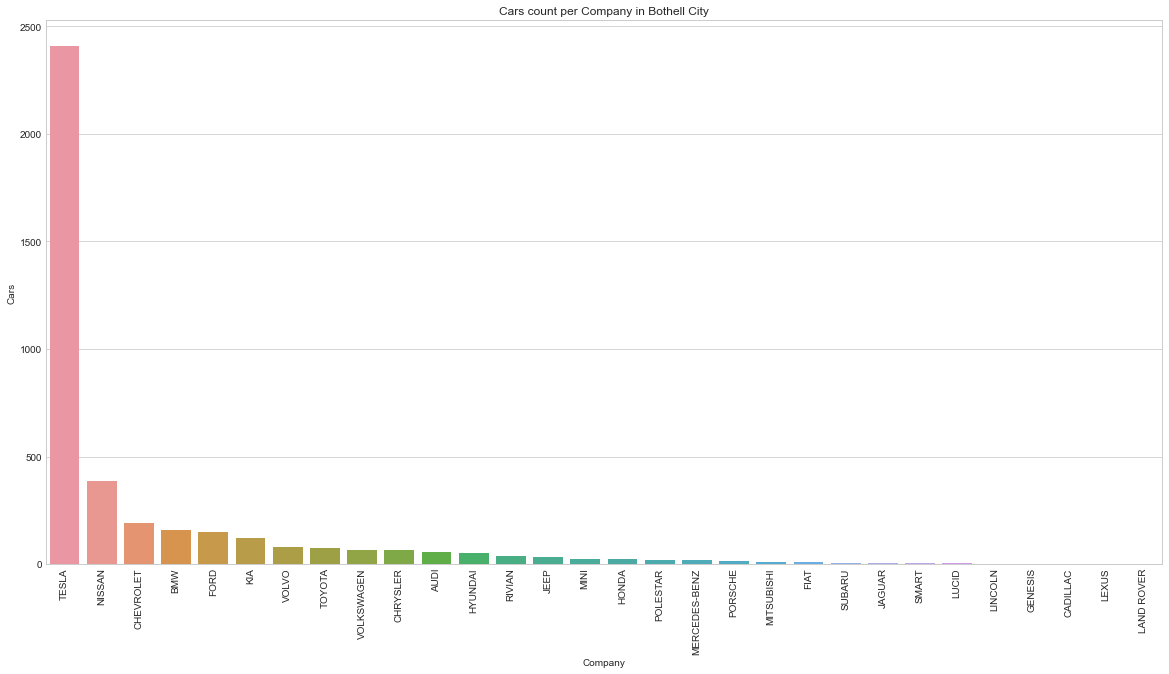

In [8]:
car_makers = data[data.City == 'Bothell'].Make.value_counts()
# creating figure and axes
fig, ax = plt.subplots(figsize=(20, 10))
# barplot
sns.barplot(x=car_makers.index, y=car_makers.values, ax=ax)

ax.set_xlabel('Company')
ax.set_ylabel('Cars')
ax.set_title('Cars count per Company in Bothell City')
plt.xticks(rotation=90)
plt.show()

Clearly most of electric vehicle are from Tesla.

## Cars that have an electric range of more than 100, and were make after year 2015.

In [9]:
electric_by_range = data[(data['Electric Range'] > 100) & (data['Model Year'] > 2015)]
print('First 5 records\n', electric_by_range[['VIN (1-10)', 'Model Year', 'Make', 'Electric Range', ]].head())
print('-'*25)
print('Number of Cars', electric_by_range.shape[0])
print('-'*25)

First 5 records
     VIN (1-10)  Model Year   Make  Electric Range
0   5YJXCAE26J        2018  TESLA             238
2   5YJ3E1EB0K        2019  TESLA             220
4   5YJSA1E21H        2017  TESLA             210
12  5YJ3E1EC7L        2020  TESLA             308
13  5YJ3E1EB2L        2020  TESLA             322
-------------------------
Number of Cars 34066
-------------------------


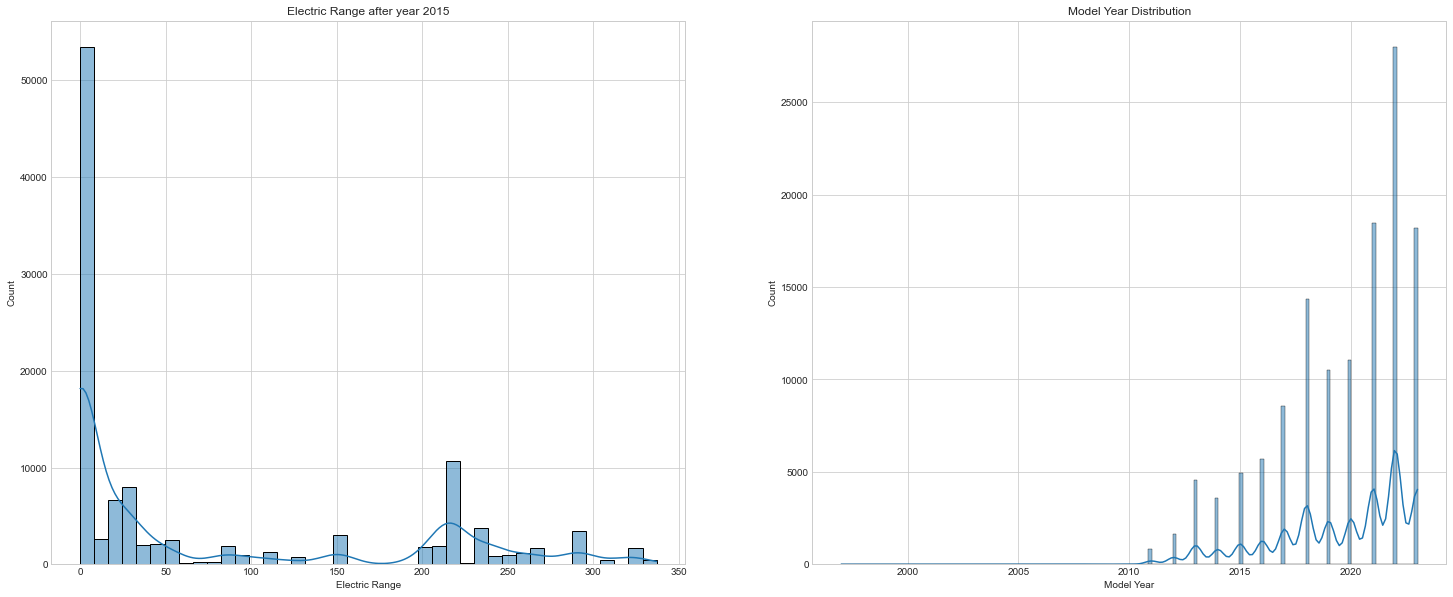

In [10]:
# creating figure and axes
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(25, 10))
after_year = data[data['Model Year'] > 2015]['Electric Range']
# histogram 
sns.histplot(data=after_year, ax=ax_1, kde=True)
ax_1.set_title('Electric Range after year 2015')
# histogram
sns.histplot(data=data, x='Model Year', kde=True, ax=ax_2)
ax_2.set_title('Model Year Distribution')
plt.show()

## Distribution between City and Electric Vehicle Type

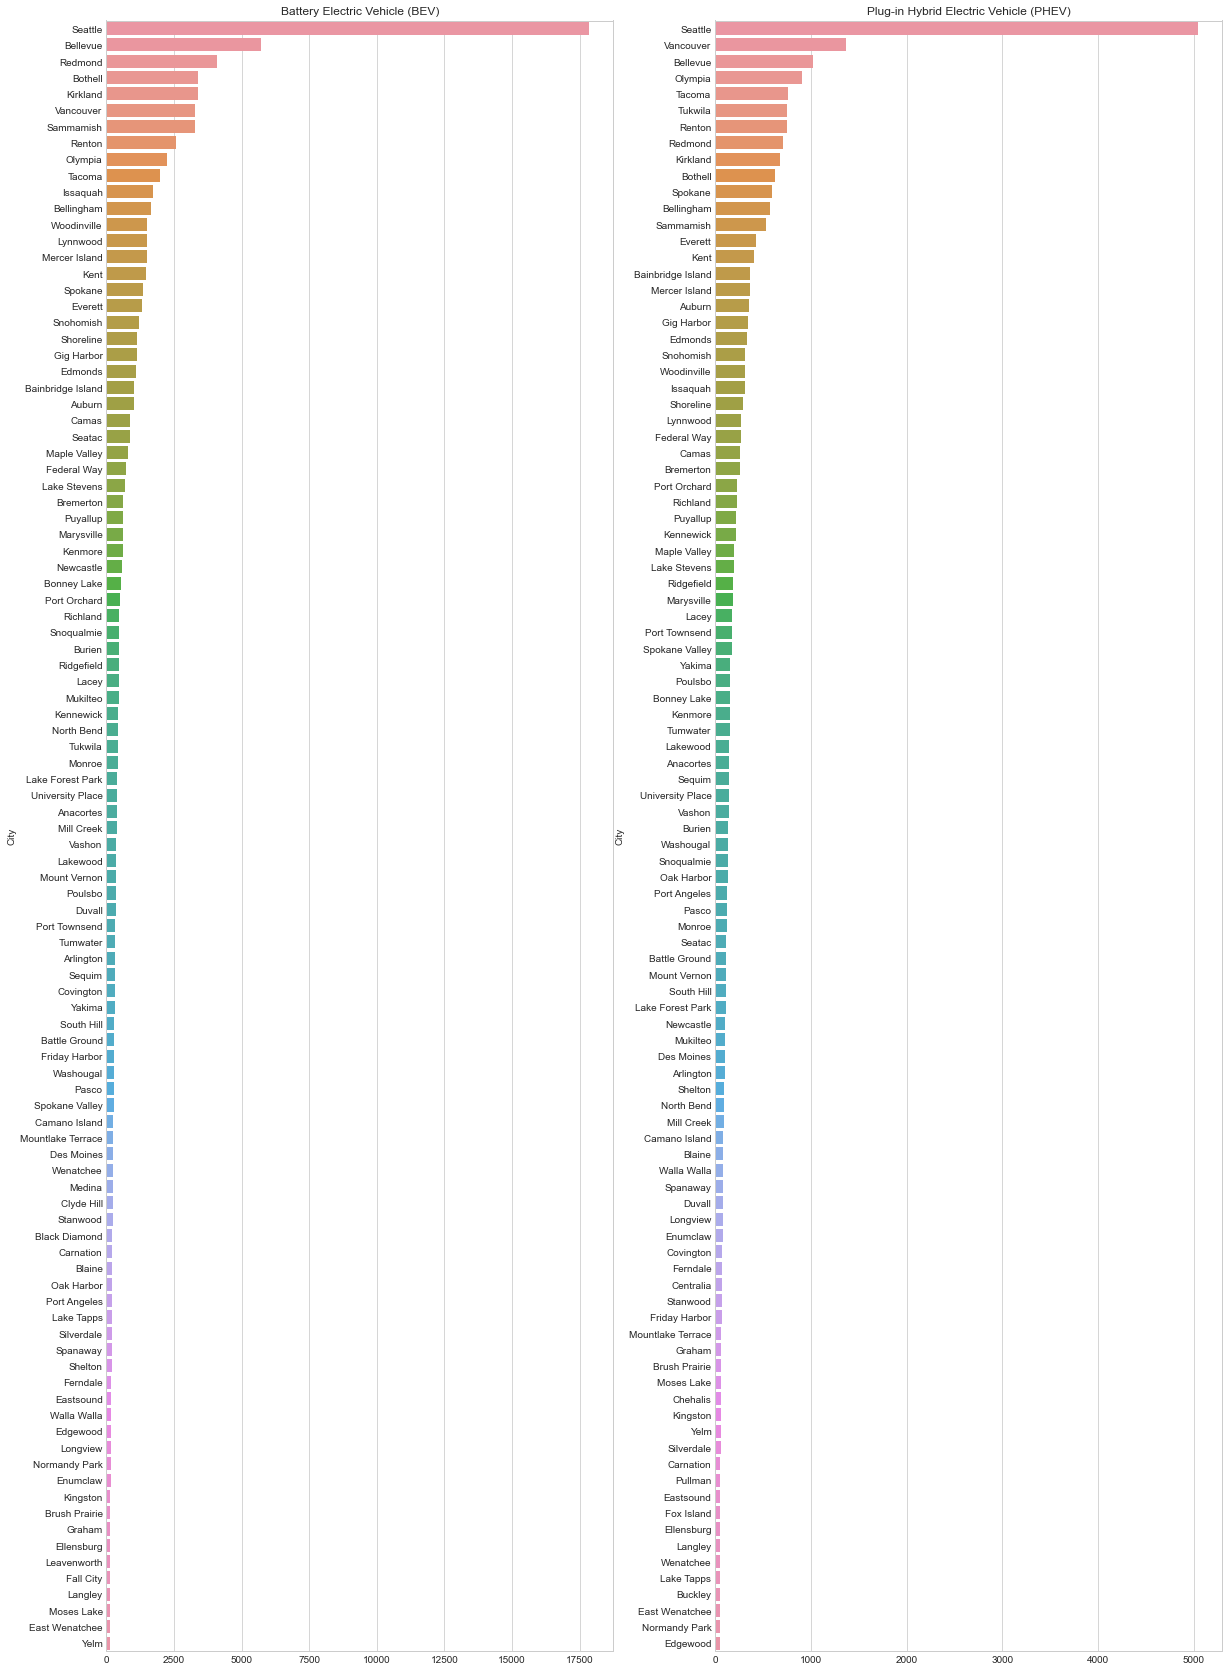

In [11]:
# selecting those values where vehicle type is BEV
bev = data[data['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)'].City.value_counts()[:100]
# selecting those values where vehicle type is PHEV
phev = data[data['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)'].City.value_counts()[:100]
# creating figure and axes
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(20, 30))
# barplot
sns.barplot(x=bev.values, y=bev.index, ax=ax_1)
# barplot
sns.barplot(x=phev.values, y=phev.index, ax=ax_2)
ax_1.set_ylabel('City')
ax_1.set_title('Battery Electric Vehicle (BEV)')
ax_2.set_ylabel('City')
ax_2.set_title('Plug-in Hybrid Electric Vehicle (PHEV)')
plt.show()